# Christmas Tree using lines that are more concentrated in the center

Christmas tree created using lines with a range of gradients to represent the tree leaves.
The lines are more concentrated in the centre of the tree, and the leaf sizes are larger at the bottom of the tree.

In [1]:
import matplotlib.pylab as plt
import numpy as np

In [2]:
colors = {
    "trunk": "C5",
    "star": "C1",
    "leaves": "C2",
}

---

## Set up

Set up the tree plotting function, and the parameters for the lines that will make up the tree leaves.

In [3]:
def plot_tree(x, constants, leaf_size=1.0, leaf_increase_factor=1.3):
    fig, ax = plt.subplots(1, 1, figsize=(6, 7))

    for c in constants:
        y = x * c
        s = leaf_size * (np.abs(y) ** leaf_increase_factor + 30)  # circle size
        y[(y > 0) | (y < -101)] = np.nan  # only keep the portions of the line in the tree area
        ax.scatter(
            x, y, s, color=colors["leaves"], alpha=1 - (np.abs(x) / x.max()) ** 0.4, zorder=2
        )

    ax.plot(0, -110, "s", color=colors["trunk"], markersize=50, zorder=1)
    ax.plot(0, 0, "*", color=colors["star"], markersize=40, zorder=3)

    ax.set_ylim([-125, 10])
    ax.set_xlim([-10, 10]);

In [4]:
# set up our x variables, with greater concentration in the middle
x = np.logspace(np.log10(0.05), np.log10(10.5), 50)
# we want both positive and negative
x = np.sort(np.hstack([-x, x]))

nx = len(x)

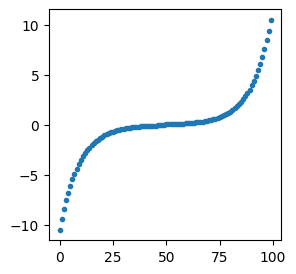

In [5]:
# check
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(range(nx), x, ".");

In [6]:
# set up gradients for lines
constants = np.logspace(np.log10(12.5), np.log10(1.6e6), 100)
constants = np.sort(np.hstack([constants, -constants]))

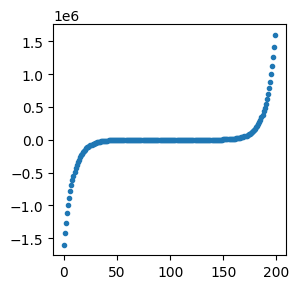

In [7]:
# check
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.plot(range(len(constants)), constants, ".");

---

## Plot the tree

The size of the leaves and and amount they increase in size lower in the tree is tunable. I recommend values of:
* leaf size: between 0 and 2
* leaf increase factor: 0.5 to 1.5

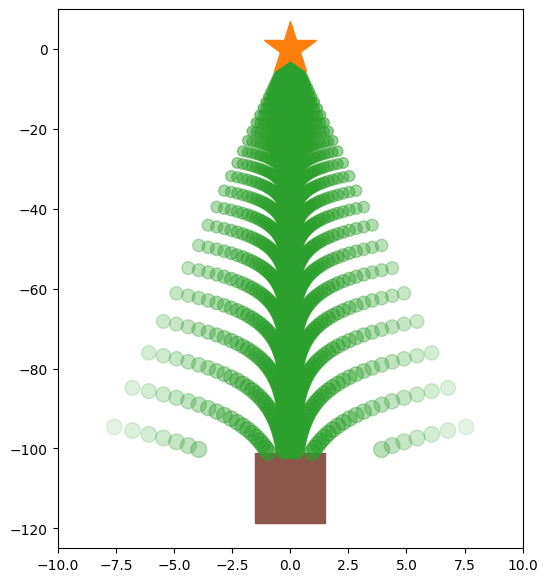

In [8]:
plot_tree(x, constants, leaf_size=1, leaf_increase_factor=1)

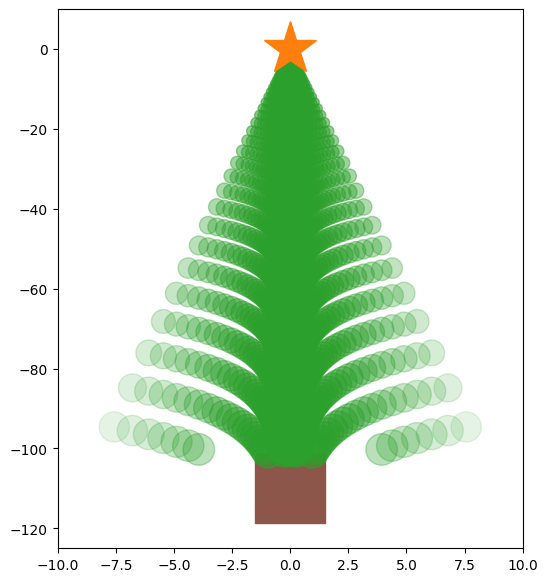

In [9]:
plot_tree(x, constants, leaf_size=0.5, leaf_increase_factor=1.5)

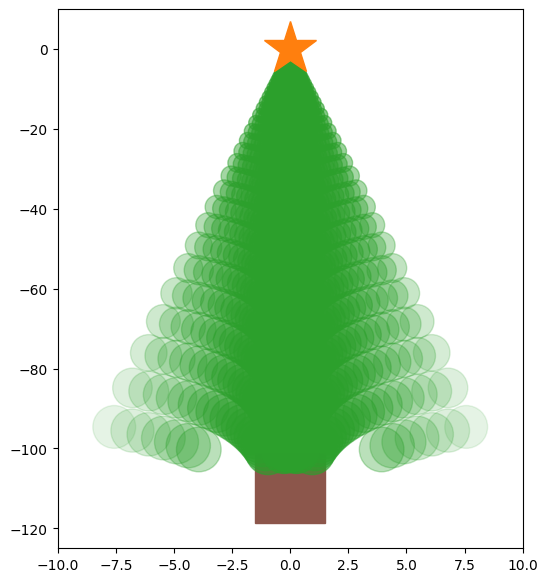

In [10]:
plot_tree(x, constants, leaf_size=1.0, leaf_increase_factor=1.5)